In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sauravmaheshkar/huggingface-question-answering-models")

print("Path to dataset files:", path)

100%|██████████| 31.6G/31.6G [07:00<00:00, 80.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sauravmaheshkar/huggingface-question-answering-models/versions/3


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load dataset: contoh menggunakan CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalisasi data citra
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
model = keras.Sequential([
    # Layer pertama: Convolutional + MaxPooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Layer kedua: Convolutional + MaxPooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Layer ketiga: Convolutional + MaxPooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer: 10 kelas (untuk dataset CIFAR-10)
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.3314 - loss: 1.8134 - val_accuracy: 0.5393 - val_loss: 1.2857
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.5630 - loss: 1.2270 - val_accuracy: 0.6074 - val_loss: 1.1269
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6260 - loss: 1.0552 - val_accuracy: 0.6454 - val_loss: 1.0060
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6617 - loss: 0.9602 - val_accuracy: 0.6580 - val_loss: 0.9937
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6877 - loss: 0.8861 - val_accuracy: 0.6664 - val_loss: 0.9437
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7096 - loss: 0.8322 - val_accuracy: 0.6864 - val_loss: 0.8981
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7245 - loss: 0.7754 - val_accuracy: 0.6849 - val_loss: 0.9084
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7363 -

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7097 - loss: 0.8652
Test Accuracy: 0.7075999975204468


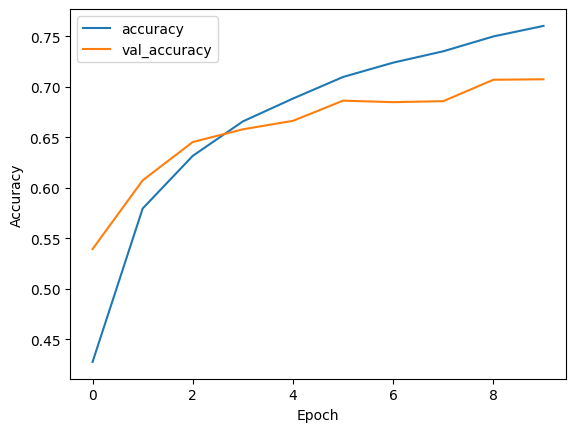

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()